# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import contractions
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('wordnet')


import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\cleaned_data.csv
input\Depression_Detection.csv
input\.ipynb_checkpoints\Depression_Detection-checkpoint.csv


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Loading

In [2]:
df = pd.read_csv('input/Depression_Detection.csv')

***Preliminary Analysis***

In [3]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,depression
1,Am I weird I don't get affected by compliments...,no-depression
2,Finally 2020 is almost over... So I can never ...,no-depression
3,i need helpjust help me im crying so hard,depression
4,"I’m so lostHello, my name is Adam (16) and I’v...",depression


In [4]:
df.shape

(232074, 2)

In [5]:
df['class'].unique().tolist()

['depression', 'no-depression']

In [6]:
df['class'].value_counts()

class
depression       116037
no-depression    116037
Name: count, dtype: int64

# Data Preprocessing

In [7]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [9]:
class_labels = df['class'].unique().tolist()
class_labels.sort()

print(class_labels)

['depression', 'no-depression']


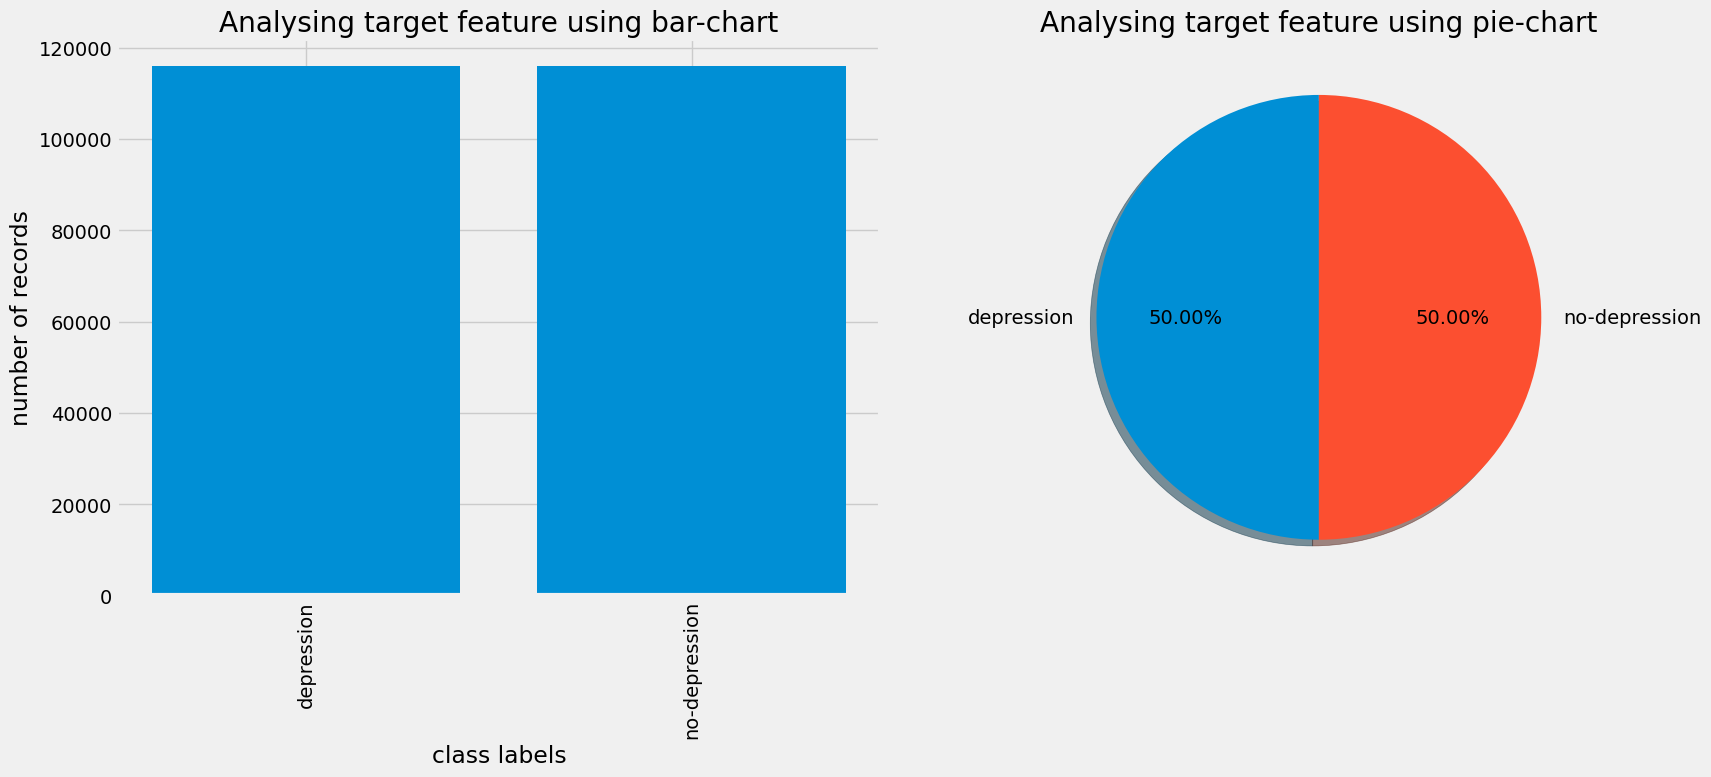

In [10]:
viz_data = dict(df['class'].value_counts())

with plt.style.context(style='fivethirtyeight'):
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,8))
    axes[0].bar(x=list(viz_data.keys()),
                height=list(viz_data.values()))
    axes[0].set_title(label='Analysing target feature using bar-chart')
    axes[0].set_xlabel(xlabel='class labels')
    axes[0].set_ylabel(ylabel='number of records')
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)
    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%',pctdistance=0.60,
                startangle=90,
                shadow=True)
    axes[1].set_title(label='Analysing target feature using pie-chart')
    fig.tight_layout()
    plt.show()

In [11]:
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,depression
1,Am I weird I don't get affected by compliments...,no-depression
2,Finally 2020 is almost over... So I can never ...,no-depression
3,i need helpjust help me im crying so hard,depression
4,"I’m so lostHello, my name is Adam (16) and I’v...",depression


In [12]:
def clean_text(text):
    # expand contraction for words
    text=contractions.fix(text)
    # remove charectir emojes
    emoticons = [r':\)', r':\(', r':P']
    pattern = '|'.join(emoticons)
    text = re.sub(pattern, '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove URLs (http and https)
    text = re.sub(r'https?://\S+', '', text)
    # remove non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text)
    # remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Perform lemmatization on each word in the sentence
    blob = TextBlob(text)
    lemmatized_words = [word.lemmatize() if word.lower() != 'was' else 'was' for word in blob.words]
    # Join the lemmatized words back into a sentence
    lemmatized_sentence = " ".join(lemmatized_words)
    # convert to lowercase
    text = lemmatized_sentence.lower()
    return text

In [13]:
sentences = []

for sentence in tqdm(df['text'].values.tolist()):
    try:
        sentences.append(clean_text(sentence))
    except:
        sentences.append("empty")

100%|█████████████████████████████████████████████████████████████████████████| 232074/232074 [12:06<00:00, 319.48it/s]


In [14]:
df['cleaned_text'] = sentences
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,depression,ex wife threatening suiciderecently i left my ...
1,Am I weird I don't get affected by compliments...,no-depression,am i weird i do not get affected by compliment...
2,Finally 2020 is almost over... So I can never ...,no-depression,finally 2020 is almost over so i can never hea...
3,i need helpjust help me im crying so hard,depression,i need helpjust help me i am cry so hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",depression,i am so losthello my name is adam 16 and i hav...


In [15]:
df = df.drop(df.loc[df['cleaned_text'] == "empty"].index, axis=0)
df.shape

(232072, 3)

In [16]:
df['sequence_length'] = df['cleaned_text'].apply(lambda x: len(str(x).split(' ')))
df.head()

,text,class,cleaned_text,sequence_length
0,Ex Wife Threatening SuicideRecently I left my ...,depression,ex wife threatening suiciderecently i left my ...,147
1,Am I weird I don't get affected by compliments...,no-depression,am i weird i do not get affected by compliment...,29
2,Finally 2020 is almost over... So I can never ...,no-depression,finally 2020 is almost over so i can never hea...,27
3,i need helpjust help me im crying so hard,depression,i need helpjust help me i am cry so hard,10
4,"I’m so lostHello, my name is Adam (16) and I’v...",depression,i am so losthello my name is adam 16 and i hav...,456


In [17]:
df['sequence_length'].min()

np.int64(1)

In [18]:
df['sequence_length'].max()

np.int64(9684)

In [19]:
count_less_equal_100 = len(df[df['sequence_length'] <= 100])

print("Count of records with sequence_length <= 100:", count_less_equal_100)

Count of records with sequence_length <= 100: 145671


In [20]:
df.loc[df['sequence_length'] <= 5]

,text,class,cleaned_text,sequence_length
14,Been arrested - feeling suicidalEdit,depression,been arrested feeling suicidaledit,4
58,OwThe past is unforgiving,depression,owthe past is unforgiving,4
168,lmaolmabsjdbbsjxbwnxhhdjsshdcmwbdjjf jrhdsndhd...,no-depression,lmaolmabsjdbbsjxbwnxhhdjsshdcmwbdjjf jrhdsndhd...,2
263,Oct 22 2016Jag vill dö.,depression,oct 22 2016jag vill dö,5
324,slugsoul adopted me 😎,no-depression,slugsoul adopted me,3
...,...,...,...,...
231307,"Aight ladies, form a line 😎 https://imgur.com/...",no-depression,aight lady form a line,5
231510,twelfth night ahhhh,no-depression,twelfth night ahhhh,3
231601,It's simply Impossible. &amp;#x200B;\n\nhttps:...,no-depression,it is simply impossible amp,5
231673,FailureForever sleep needed.,depression,failureforever sleep needed,3


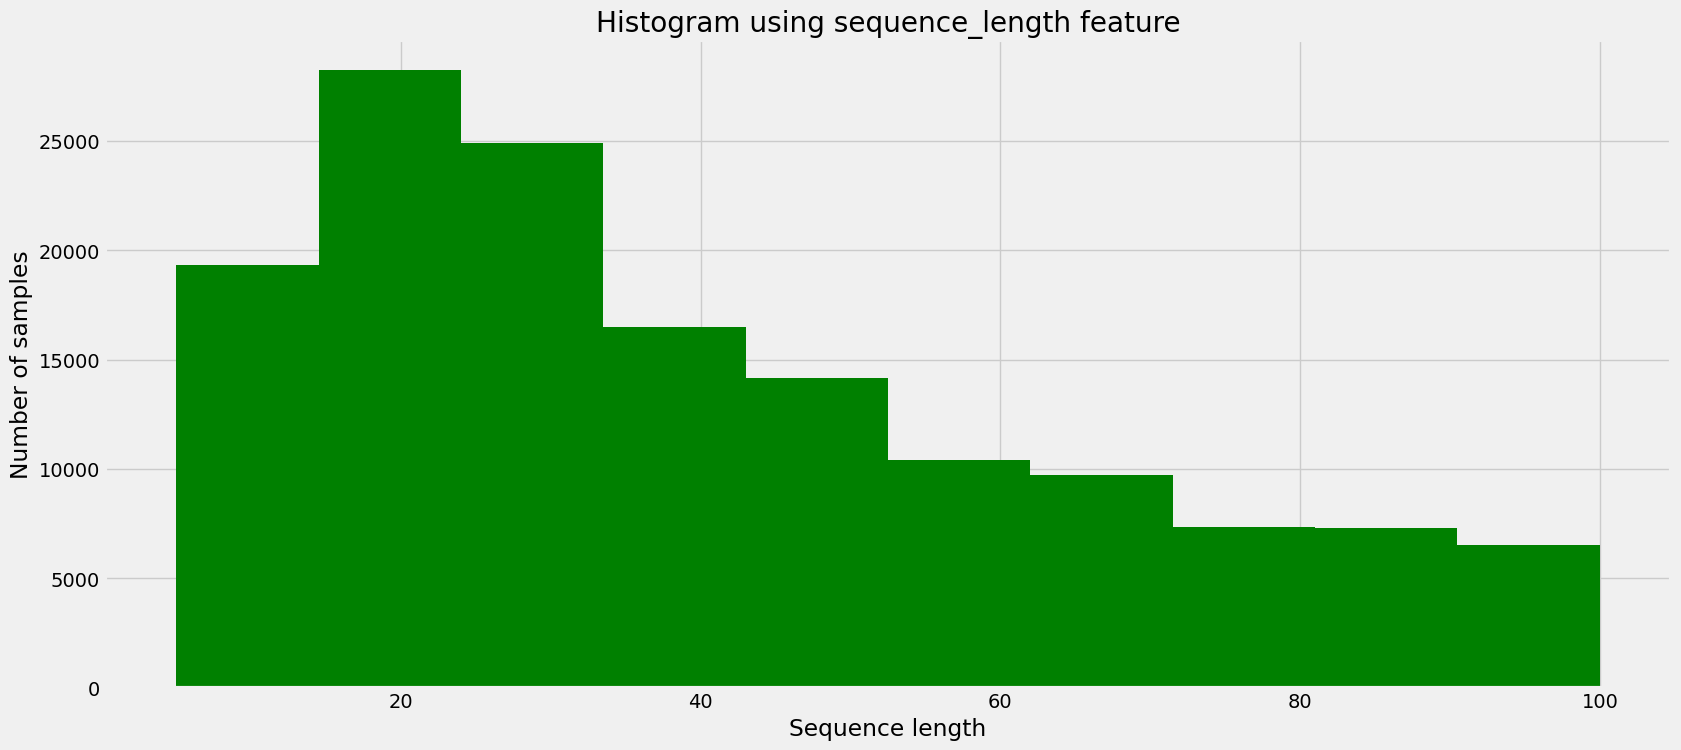

In [21]:
text_df = df.loc[(df['sequence_length'] >= 5) & (df['sequence_length'] <= 100)]

with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.hist(text_df['sequence_length'].values,color='green')
    plt.title(label='Histogram using sequence_length feature')
    plt.xlabel(xlabel='Sequence length')
    plt.ylabel(ylabel='Number of samples')
    plt.show()

In [23]:
text_df = text_df[['cleaned_text','class']]

In [24]:
text_df.head()

,cleaned_text,class
1,am i weird i do not get affected by compliment...,no-depression
2,finally 2020 is almost over so i can never hea...,no-depression
3,i need helpjust help me i am cry so hard,depression
7,it end tonighti can not do it anymore i quit,depression
10,i took the rest of my sleeping pill and my pai...,depression


In [25]:
text_df.shape

(144428, 2)

In [26]:
text_df['class'].value_counts()

class
no-depression    98774
depression       45654
Name: count, dtype: int64

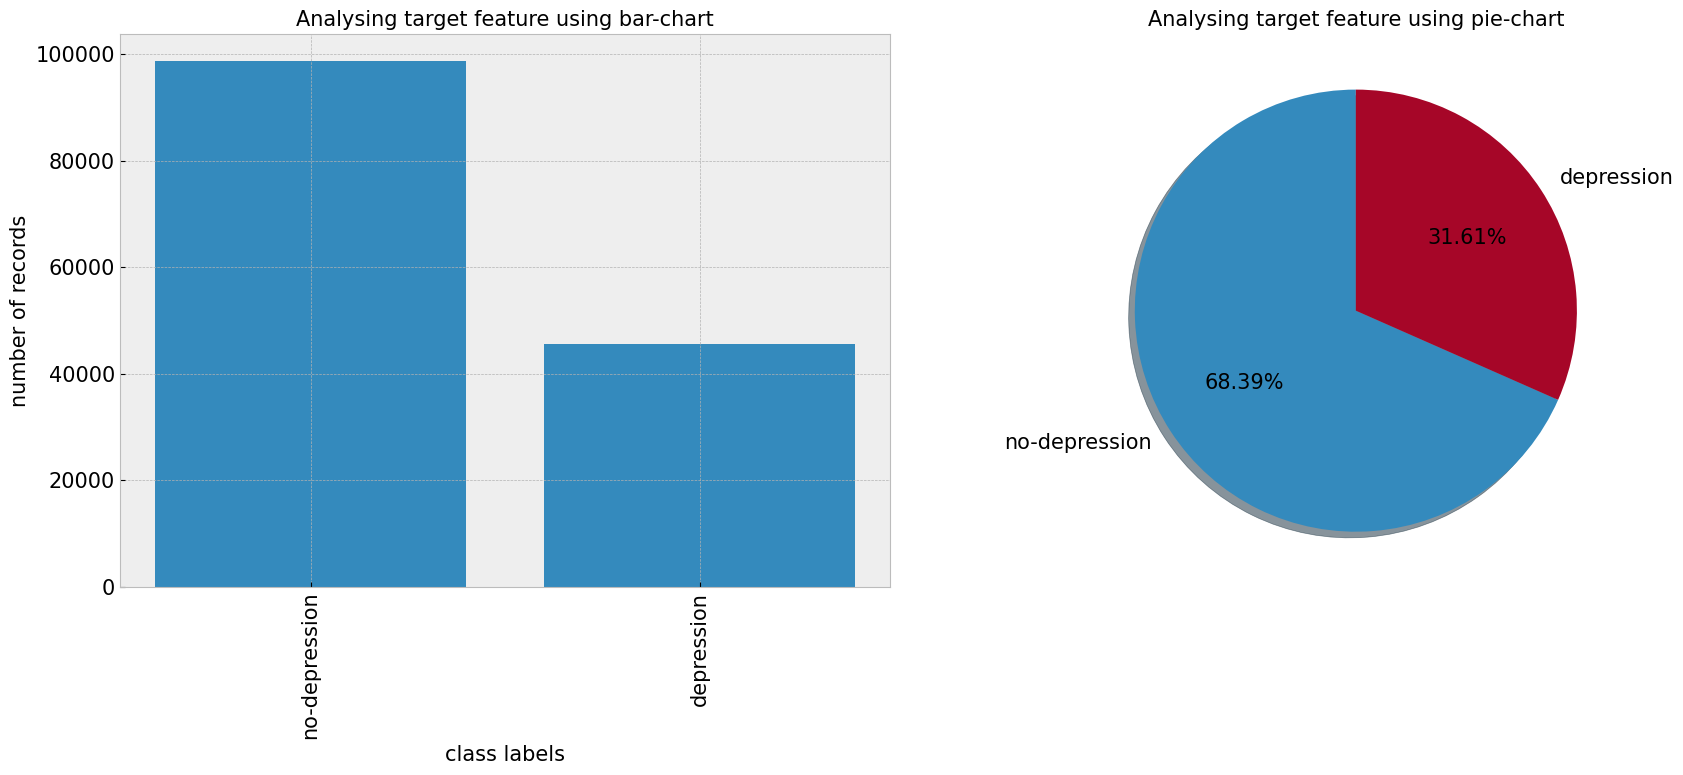

In [27]:
viz_data = dict(text_df['class'].value_counts())

with plt.style.context(style='bmh'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    plt.rcParams['font.size'] = 15

    axes[0].bar(x=list(viz_data.keys()),
                height=list(viz_data.values()))
    axes[0].set_title(label='Analysing target feature using bar-chart', fontsize=15)
    axes[0].set_xlabel(xlabel='class labels', fontsize=15)
    axes[0].set_ylabel(ylabel='number of records', fontsize=15)
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)
    axes[0].tick_params(axis='both', labelsize=15)

    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True)
    axes[1].set_title(label='Analysing target feature using pie-chart', fontsize=15)

    fig.tight_layout()
    plt.show()

In [28]:
no_depression_df = text_df[text_df['class'] == 'no-depression']
depression_df = text_df[text_df['class'] == 'depression']

no_depression_sampled = no_depression_df.sample(n=45654, random_state=42)

balanced_df = pd.concat([no_depression_sampled, depression_df])

# Shuffle the dataset to randomize the order
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced dataset created with", len(balanced_df), "records.")

Balanced dataset created with 91308 records.


In [29]:
balanced_df['class'].value_counts()

class
depression       45654
no-depression    45654
Name: count, dtype: int64

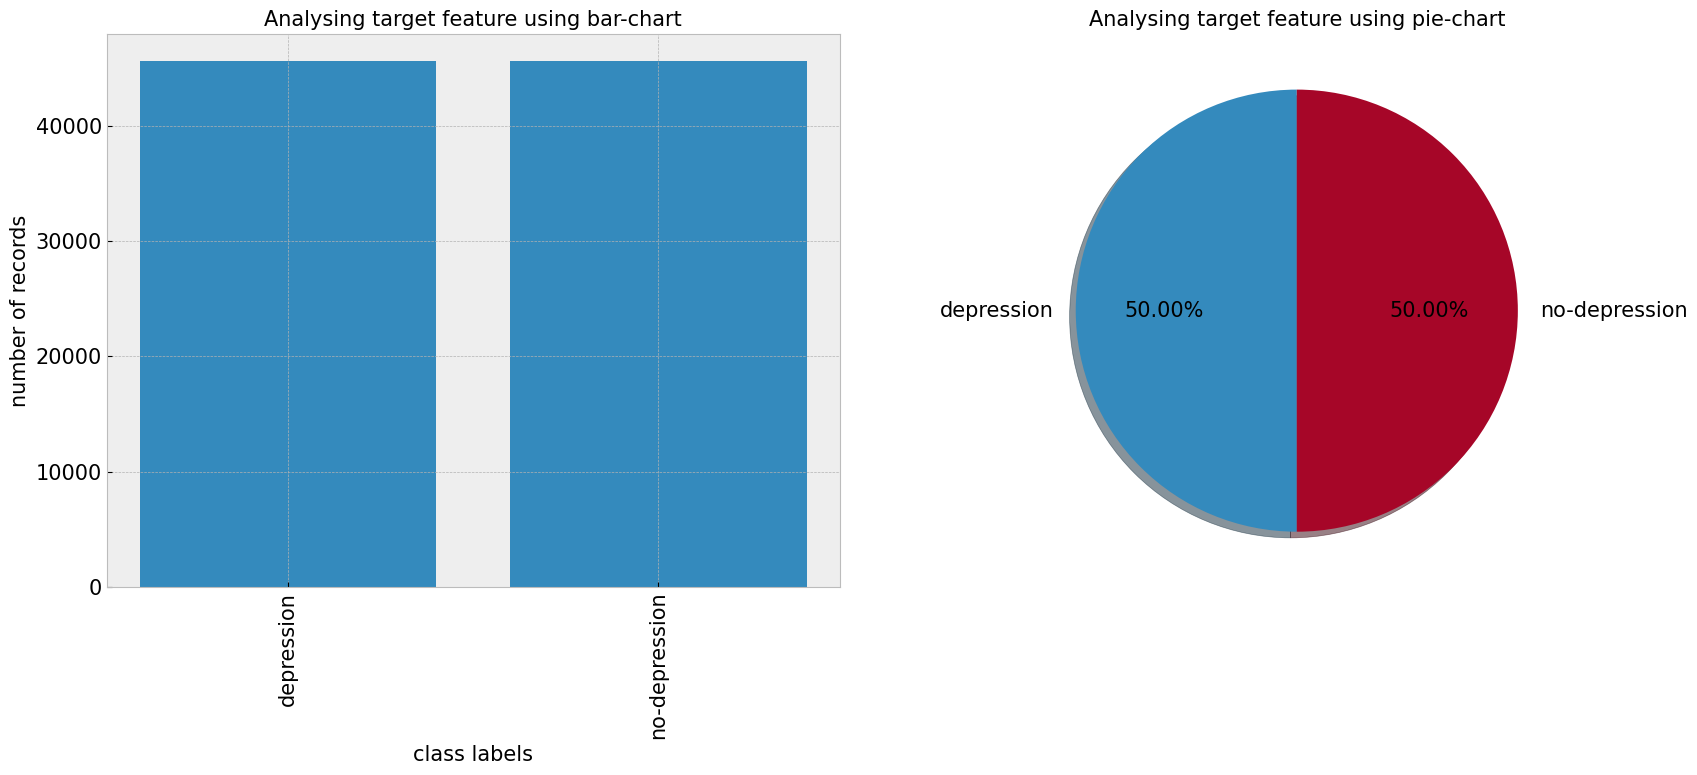

In [30]:
viz_data = dict(balanced_df['class'].value_counts())

with plt.style.context(style='bmh'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

    plt.rcParams['font.size'] = 15

    axes[0].bar(x=list(viz_data.keys()),
                height=list(viz_data.values()))
    axes[0].set_title(label='Analysing target feature using bar-chart', fontsize=15)
    axes[0].set_xlabel(xlabel='class labels', fontsize=15)
    axes[0].set_ylabel(ylabel='number of records', fontsize=15)
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(90)
    axes[0].tick_params(axis='both', labelsize=15)

    axes[1].pie(x=list(viz_data.values()),
                labels=list(viz_data.keys()),
                autopct='%.2f%%', pctdistance=0.60,
                startangle=90,
                shadow=True)
    axes[1].set_title(label='Analysing target feature using pie-chart', fontsize=15)

    fig.tight_layout()
    plt.show()

In [31]:
balanced_df.to_csv("input/cleaned_data.csv", index=False)